In [4]:
import parse_data.prepare_data as prepare_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import globals
import plotting.plot_trajectory as plot_trajectory
import plotting.plot_octagon as plot_octagon
import data_extraction.extract_trial as extract_trial
import math
import trajectory_analysis.trajectory_vectors as trajectory_vectors
import trajectory_analysis.trajectory_direction as trajectory_direction

In [5]:
# paths
# data_folder = '/home/tom/Documents/SWC/data' # desktop Duan Lab
data_folder = r'D:\Users\Tom\OneDrive\PhD\SWC\data' # desktop home
# data_folder = r'C:\Users\tomha\OneDrive\PhD\SWC\data' # octagon laptop
# json_filename = '240913_Yansu_Jerry/2024-09-13_11-53-34_YansuSecondSolo.json' 
# json_filename = '240913_Yansu_Jerry/2024-09-13_11-31-00_YansuJerrySocial.json'
# json_filenames = [r'first_experiments_2409\240913\2024-09-13_11-23-37_YansuFirstSolo.json']
# json_filenames = [r'first_experiments_2409\240913\2024-09-13_11-31-00_YansuJerrySocial.json']
json_filenames = [r'fourth_experiments_2410\241017\2024-10-17_16-41-38_ZimoElsaSocial.json']

In [6]:
df, trials_list = prepare_data.prepare_data(data_folder, json_filenames)

filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\fourth_experiments_2410\241017\2024-10-17_16-41-38_ZimoElsaSocial.json
Loading complete.
Preprocessing complete.


In [7]:
trial = trials_list[50]

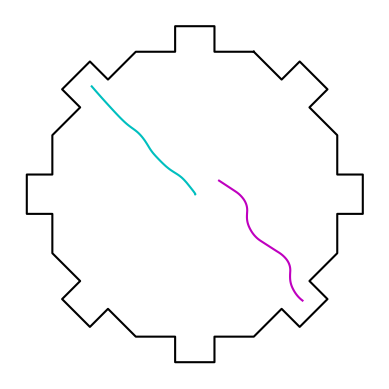

In [8]:
# plot both trajectories from a single trial
ax = plot_octagon.plot_octagon()
plot_trajectory.plot_trial_trajectory(ax, trial=trial)

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.show()

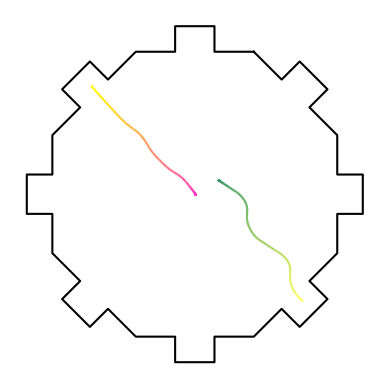

In [9]:
ax = plot_octagon.plot_octagon()
plot_trajectory.plot_trial_trajectory_colour_map(ax, trial=trial)

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.show()

In [10]:
trajectory = trajectory_vectors.extract_trial_player_trajectory(trial=trial, player_id=0)

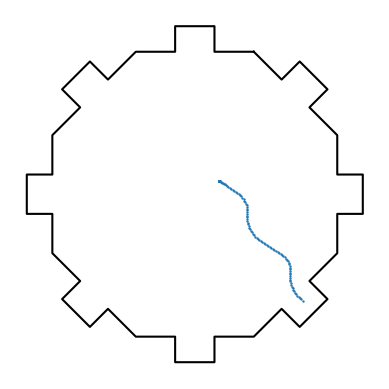

In [21]:
# plot only a single trajectory from this trial
ax = plot_octagon.plot_octagon()
ax.scatter(trajectory[0,:], trajectory[1,:], s=0.5)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.show()

In [12]:
direction_vectors_smoothed = trajectory_direction.get_smoothed_player_direction_vectors_for_trajectory(trajectory,
                                                                                                       window_size=10)

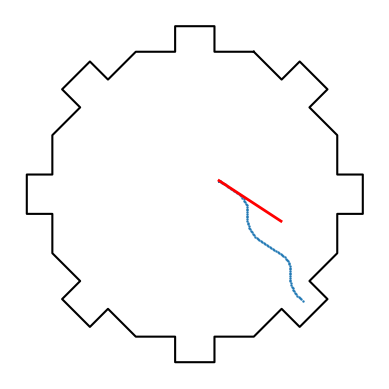

In [37]:
# example plotting of direction vector
start_index=20
x_start = trajectory[0,start_index]
y_start = trajectory[1,start_index]
x_gradient = direction_vectors_smoothed[0,start_index]
y_gradient = direction_vectors_smoothed[1,start_index]
vector_length = 200

start = [x_start, y_start]
end = [x_start + x_gradient*vector_length, y_start + y_gradient*vector_length]

direction_vector_coordinates = np.array(list(zip(start,end)))

ax = plot_octagon.plot_octagon()
ax.scatter(trajectory[0,:], trajectory[1,:], s=0.5)
ax.plot(direction_vector_coordinates[0,:], direction_vector_coordinates[1,:], c='r', linewidth=2)

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.show()

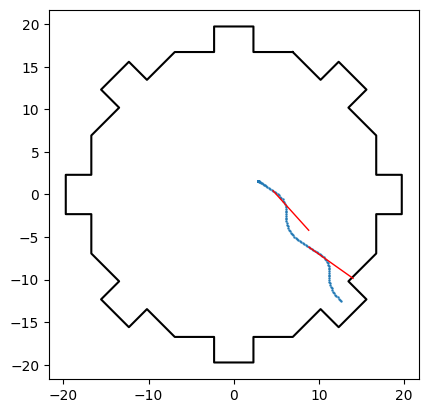

In [14]:
## Find the average direction vector at equally-spaced points throughout the trajectory 
ax = plot_octagon.plot_octagon()
ax.scatter(trajectory[0,:], trajectory[1,:], s=0.5)

for time_index in range(0, direction_vectors_smoothed.shape[1], 40):
    x_start = trajectory[0,time_index]
    y_start = trajectory[1,time_index]
    x_gradient = direction_vectors_smoothed[0,time_index]
    y_gradient = direction_vectors_smoothed[1,time_index]
    vector_length = 30
    
    start = [x_start, y_start]
    end = [x_start + x_gradient*vector_length, y_start + y_gradient*vector_length]
    
    this_direction_vector_coordinates = np.array(list(zip(start,end)))
    ax.plot(this_direction_vector_coordinates[0,:], this_direction_vector_coordinates[1,:], c='r', linewidth=1)

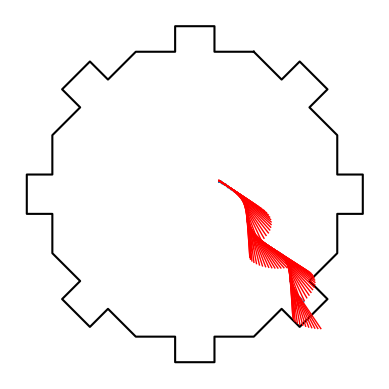

In [22]:
## Find the average direction vector at all points throughout the trajectory 
ax = plot_octagon.plot_octagon()
ax.scatter(trajectory[0,:], trajectory[1,:], s=0.5)

for time_index in range(0, direction_vectors_smoothed.shape[1]):
    x_start = trajectory[0,time_index]
    y_start = trajectory[1,time_index]
    x_gradient = direction_vectors_smoothed[0,time_index]
    y_gradient = direction_vectors_smoothed[1,time_index]
    vector_length = 30
    
    start = [x_start, y_start]
    end = [x_start + x_gradient*vector_length, y_start + y_gradient*vector_length]
    
    this_direction_vector_coordinates = np.array(list(zip(start,end)))
    ax.plot(this_direction_vector_coordinates[0,:], this_direction_vector_coordinates[1,:], c='r', linewidth=1)

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.show()

In [16]:
trial = trials_list[50]
trajectory = trajectory_vectors.extract_trial_player_trajectory(trial=trial, player_id=0)

In [17]:
cosine_similarity_trajectory = trajectory_direction.cosine_similarity_throughout_trajectory(trajectory,
                                                                                            window_size=10,
                                                                                            num_walls=8,
                                                                                            calculate_thetas=False)

d:\tom\documents\swc\repos\octagon_analysis\trajectory_analysis\trajectory_vectors.py:193: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * direction_vector_norm)


In [18]:
cosine_similarity_trajectory[:,70:80]

array([[-0.58657437, -0.56991709, -0.55809356, -0.55137116, -0.54954928,
        -0.54874959, -0.54762826, -0.54992029, -0.55723226, -0.56914199],
       [ 0.15590468,  0.17620658,  0.19040163,  0.19839471,  0.20055266,
         0.20147131,  0.20279588,  0.20008583,  0.19140133,  0.17711364],
       [ 0.81140328,  0.82335686,  0.83152754,  0.83606017,  0.83727333,
         0.8378349 ,  0.83857798,  0.83705781,  0.83214137,  0.82392683],
       [ 0.98562558,  0.98189706,  0.97903034,  0.97732132,  0.97685042,
         0.97659824,  0.97630382,  0.97690244,  0.97877487,  0.98167932],
       [ 0.57138591,  0.55425892,  0.54211789,  0.53521995,  0.53336361,
         0.53227171,  0.53112191,  0.5334625 ,  0.54097223,  0.5532114 ],
       [-0.17811514, -0.19829455, -0.2123809 , -0.22030581, -0.22242789,
        -0.22369849, -0.22500986, -0.22233961, -0.21372549, -0.1995429 ],
       [-0.81906592, -0.83059255, -0.8384635 , -0.84282758, -0.84399033,
        -0.84463957, -0.84535407, -0.84389626

In [19]:
# the closer to 1 the value, the more aligned the trajectory with the wall at that index
cosine_similarity_trajectory[:,60]

array([-0.88801206, -0.30808721,  0.45547854,  0.95360506,  0.88311703,
        0.28741172, -0.47327288, -0.95561766])